### Unsupervised Learning and Preprocessing

1. PCA
2. NMF
3. KMeans
    * `MiniBatchKMeans` can handle very large datasets.
4. Agglomerative clustering
5. DBSCAN
    * min_samples
    * eps

#### Applying Data Transformations

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [50]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [51]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [52]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### Scaling Training and Test Data the Same Way

In [53]:
import matplotlib.pyplot as plt
import introduction_to_ml_with_python.mglearn as mglearn

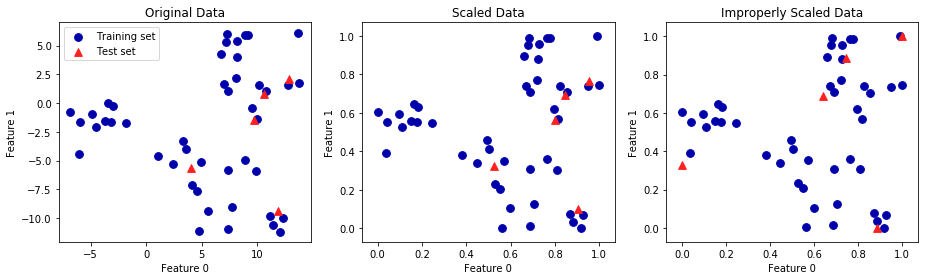

In [54]:
from sklearn.datasets import make_blobs

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

#### SHORTCUTS AND EFFICIENT ALTERNATIVES

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

#### The Effect of Preprocessing on Supervised Learning

In [56]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [57]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [58]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


Now that we’ve seen how simple data transformations for preprocessing work

### Dimensionality Reduction, Feature Extraction, and Manifold Learning

#### Principal Component Analysis (PCA)

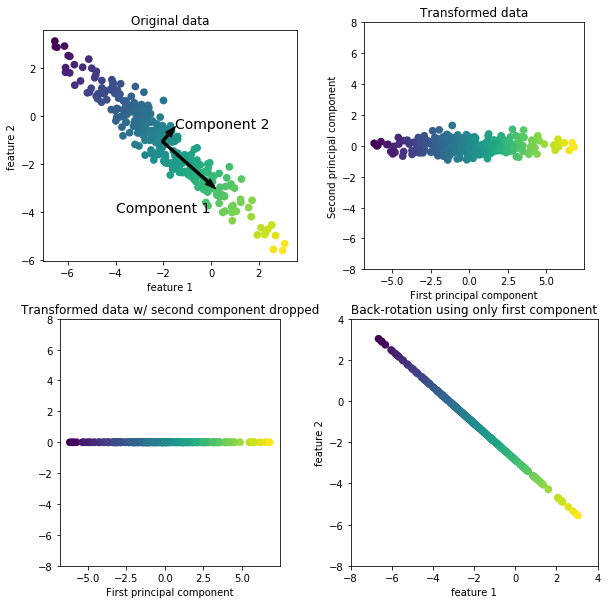

In [59]:
mglearn.plots.plot_pca_illustration()

In [60]:
import numpy as np

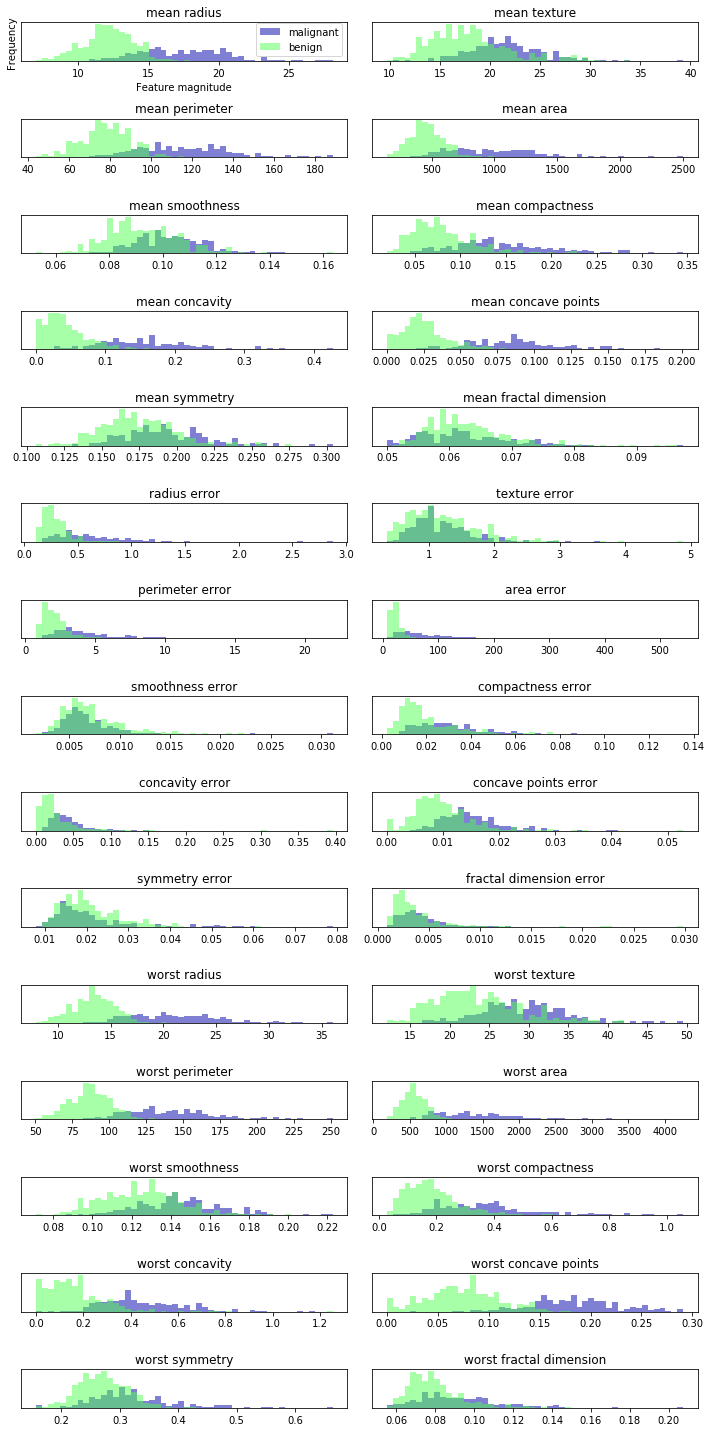

In [61]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
# Per-class feature histograms on the Breast Cancer dataset

In [62]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [63]:
X_scaled.shape

(569, 30)

In [64]:
X_scaled[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [65]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [66]:
X_pca[:2]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174]])

Text(0,0.5,'Second principal component')

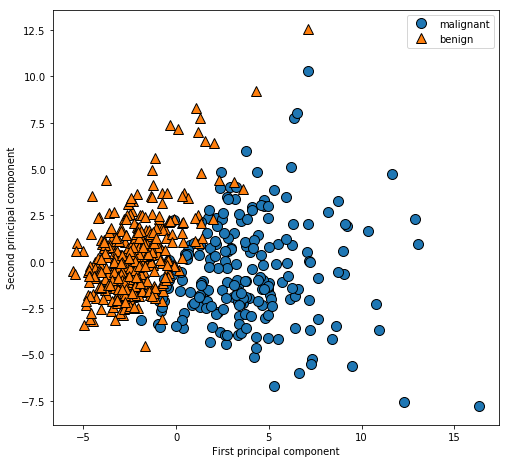

In [67]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.legend(cancer.target_names, loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [68]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in components_ corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.).

In [69]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Principal components')

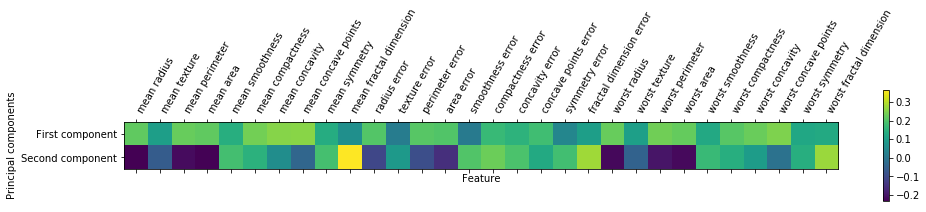

In [70]:
plt.matshow(pca.components_, cmap='viridis')

plt.yticks([0, 1], ["First component", "Second component"])

plt.colorbar()

plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha='left')

plt.xlabel("Feature")
plt.ylabel("Principal components")

#### EIGENFACES FOR FEATURE EXTRACTION

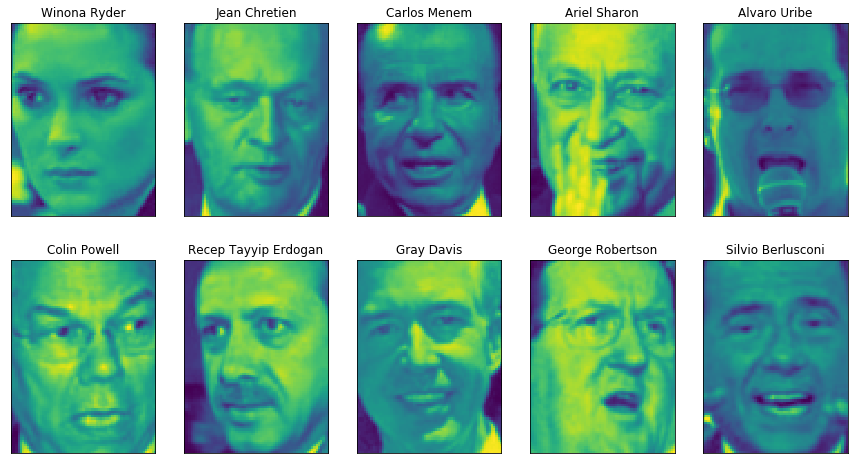

In [71]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [72]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [73]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [74]:
people.target

array([61, 25,  9, ..., 14, 15, 14])

In [75]:
people.target.shape

(3023,)

In [76]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [77]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [78]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


Computing distances in the original pixel space is quite a bad way to measure similarity between faces. 

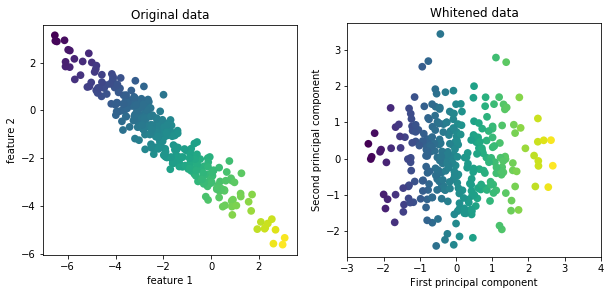

In [79]:
mglearn.plots.plot_pca_whitening()

In [80]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [81]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.28


Our accuracy improved, from 23% to 28%, confirming our intuition that the principal components might provide a better representation of the data.

In [82]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


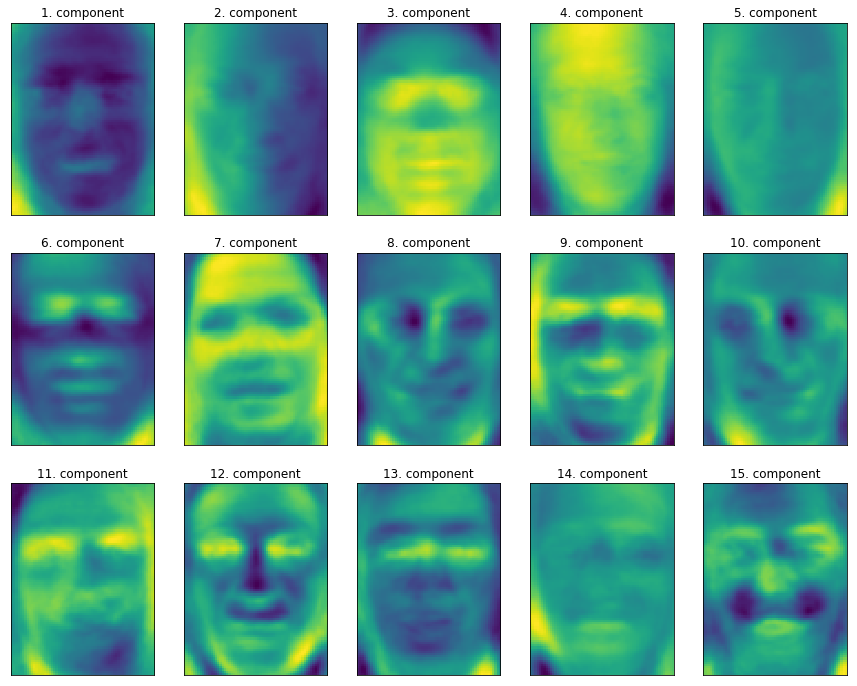

In [83]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

In [84]:
axes.ravel()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b0d43c8>,
      dtype=object)

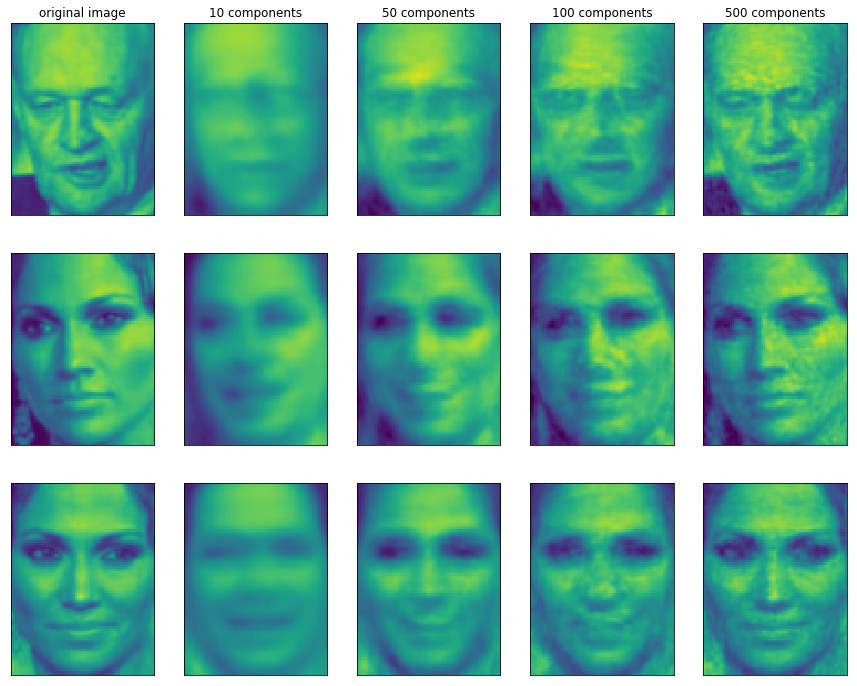

In [85]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0,0.5,'Second principal component')

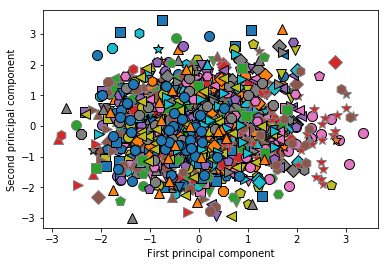

In [86]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
# Scatter plot of the faces dataset using the first two principal components 

### Non-Negative Matrix Factorization (NMF)

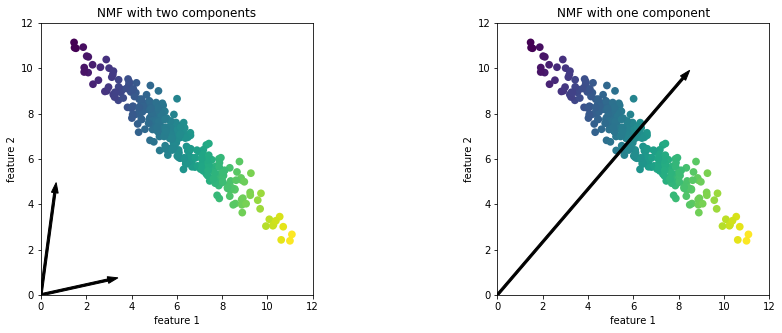

In [87]:
mglearn.plots.plot_nmf_illustration()

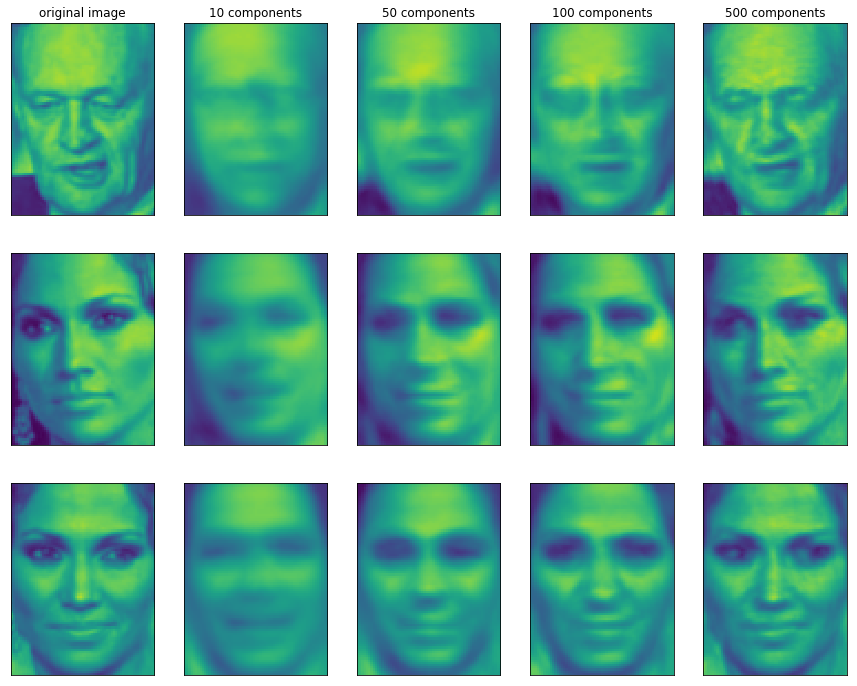

In [88]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

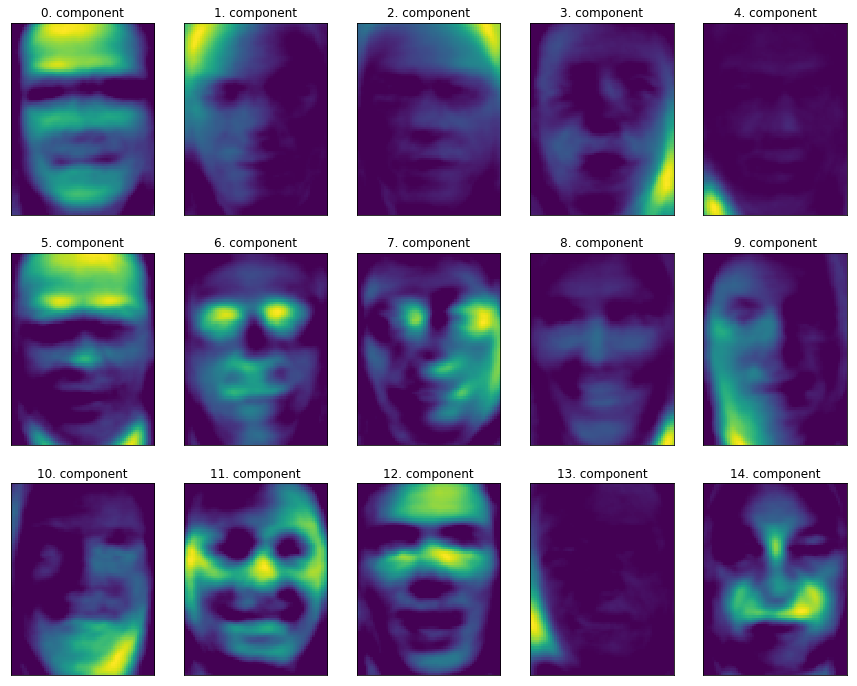

In [89]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))
    
# The components found by NMF on the faces dataset when using 15 components

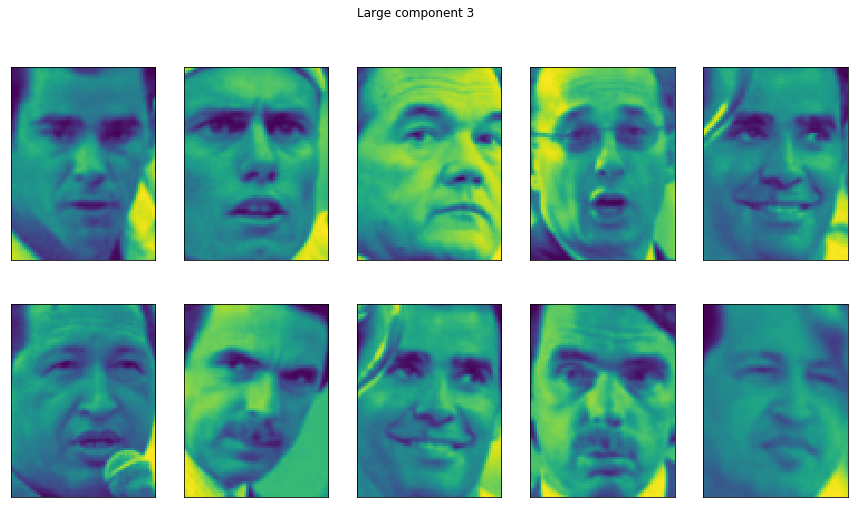

In [90]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

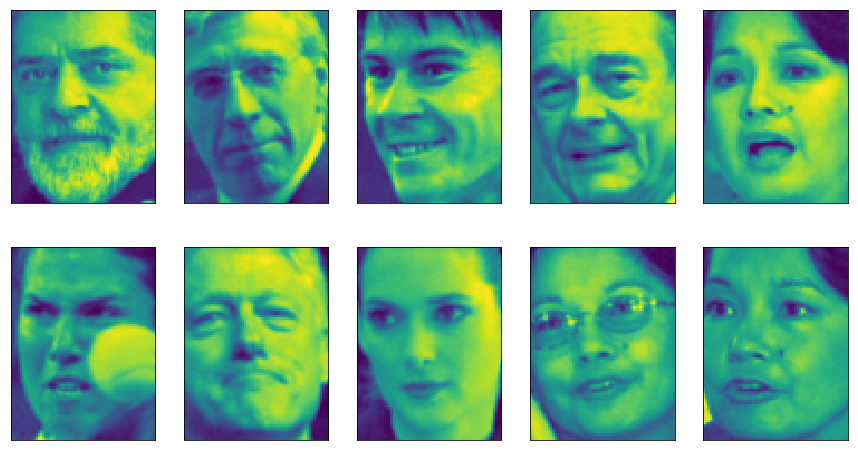

In [91]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0,0.5,'Signal')

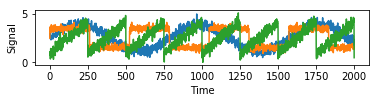

In [92]:
S = mglearn.datasets.make_signals()

plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [93]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [94]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [95]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

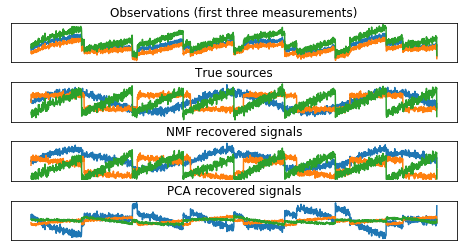

In [96]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### Manifold Learning with t-SNE

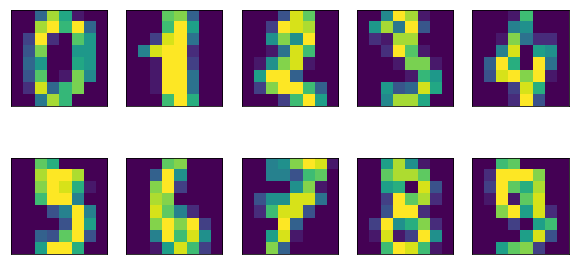

In [97]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0,0.5,'Second principal component')

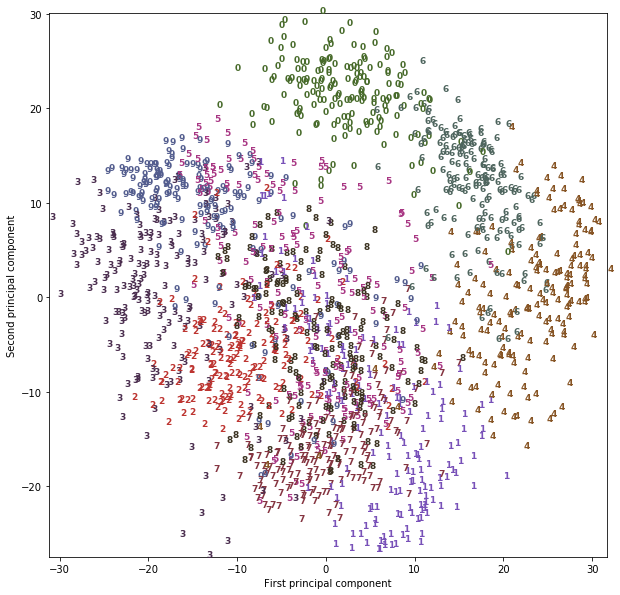

In [98]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [99]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

In [100]:
digits_tsne.shape

(1797, 2)

Text(0.5,0,'t-SNE feature 1')

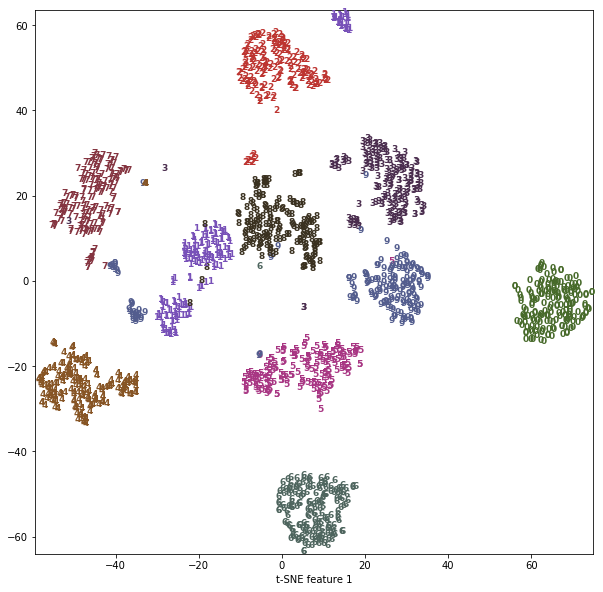

In [101]:
plt.figure(figsize=(10, 10))

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

The result of t-SNE is quite remarkable. All the classes are quite clearly separated. 

### Clustering

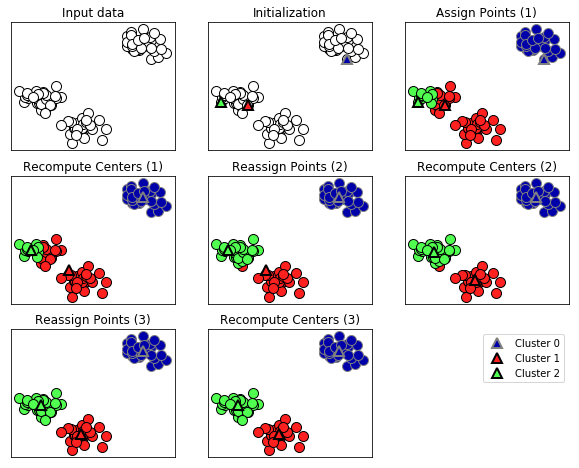

In [102]:
mglearn.plots.plot_kmeans_algorithm()

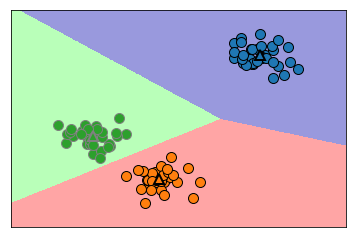

In [103]:
mglearn.plots.plot_kmeans_boundaries()

In [104]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [105]:
X[:20]

array([[ -0.79415228,   2.10495117],
       [ -9.15155186,  -4.81286449],
       [-11.44182631,  -4.45781441],
       [ -9.76761777,  -3.19133737],
       [ -4.53655648,  -8.40186288],
       [ -6.26302115,  -8.10666081],
       [ -6.38481234,  -8.4730297 ],
       [ -9.20490564,  -4.57687928],
       [ -2.76017908,   5.55121358],
       [ -1.17104176,   4.33091816],
       [-10.03640801,  -5.5691209 ],
       [ -9.87589123,  -2.82386464],
       [ -7.17532921,  -8.77059017],
       [ -2.4067182 ,   6.09894447],
       [ -4.87418245, -10.04958903],
       [ -6.078547  ,  -7.9396942 ],
       [ -6.83238762,  -7.4706767 ],
       [ -2.34673261,   3.56128423],
       [-10.34156618,  -3.90975169],
       [-11.09262435,  -3.78396611]])

In [106]:
X.shape

(100, 2)

In [107]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [108]:
len(kmeans.labels_)

100

In [109]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


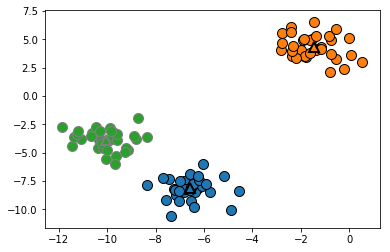

In [110]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

In [111]:
kmeans.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

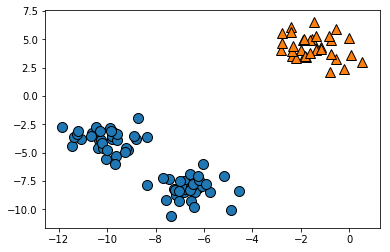

In [112]:
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments)

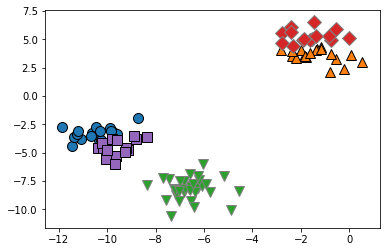

In [113]:
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments)

Text(0,0.5,'Feature 1')

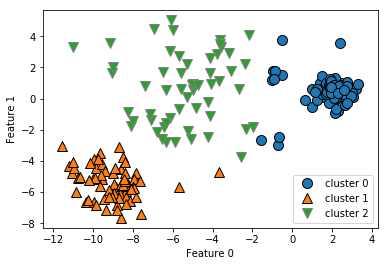

In [114]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# Cluster assignments found by k-means when clusters have different densities

As k-means only considers the distance to the nearest cluster center, it can’t handle this kind of data:

Text(0,0.5,'Feature 1')

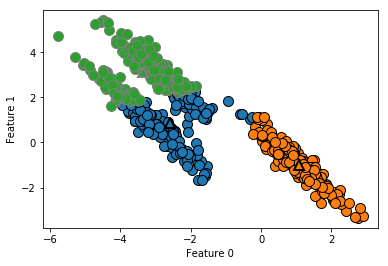

In [115]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means also performs poorly if the clusters have more complex shapes, like the two_moons data

Text(0,0.5,'Feature 1')

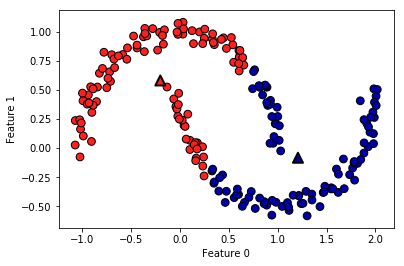

In [116]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### VECTOR QUANTIZATION, OR SEEING K-MEANS AS DECOMPOSITION

You might remember that PCA tries to find directions of maximum variance in the data, while NMF tries to find additive components, which often correspond to “extremes” or “parts” of the data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [118]:
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0,0.5,'nmf')

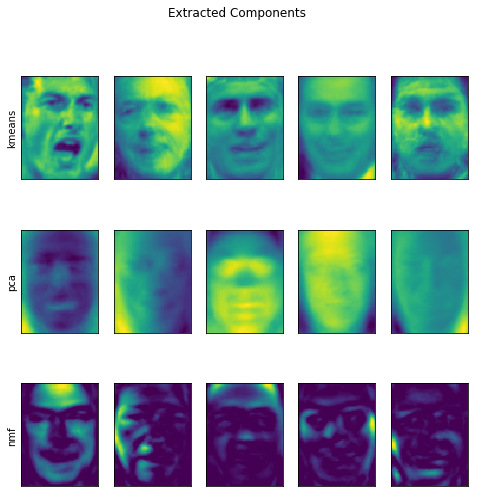

In [119]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),subplot_kw={'xticks': (), 'yticks': ()})

fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

Text(0,0.5,'nmf')

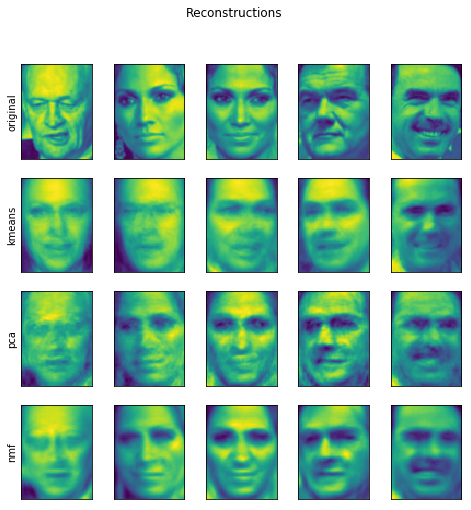

In [120]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))

fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
# Comparing image reconstructions using k-means, PCA, and NMF with 100 components (or cluster centers)—
# k-means uses only a single cluster center per image

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


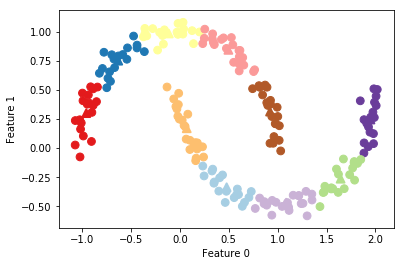

In [121]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("Cluster memberships:\n{}".format(y_pred))

In [122]:
y_pred

array([9, 2, 5, 4, 2, 7, 9, 6, 9, 6, 1, 0, 2, 6, 1, 9, 3, 0, 3, 1, 7, 6,
       8, 6, 8, 5, 2, 7, 5, 8, 9, 8, 6, 5, 3, 7, 0, 9, 4, 5, 0, 1, 3, 5,
       2, 8, 9, 1, 5, 6, 1, 0, 7, 4, 6, 3, 3, 6, 3, 8, 0, 4, 2, 9, 6, 4,
       8, 2, 8, 4, 0, 4, 0, 5, 6, 4, 5, 9, 3, 0, 7, 8, 0, 7, 5, 8, 9, 8,
       0, 7, 3, 9, 7, 1, 7, 2, 2, 0, 4, 5, 6, 7, 8, 9, 4, 5, 4, 1, 2, 3,
       1, 8, 8, 4, 9, 2, 3, 7, 0, 9, 9, 1, 5, 8, 5, 1, 9, 5, 6, 7, 9, 1,
       4, 0, 6, 2, 6, 4, 7, 9, 5, 5, 3, 8, 1, 9, 5, 6, 3, 5, 0, 2, 9, 3,
       0, 8, 6, 0, 3, 3, 5, 6, 3, 2, 0, 2, 3, 0, 2, 6, 3, 4, 4, 1, 5, 6,
       7, 1, 1, 3, 2, 4, 7, 2, 7, 3, 8, 6, 4, 1, 4, 3, 9, 9, 5, 1, 7, 5,
       8, 2], dtype=int32)

In [123]:
kmeans.cluster_centers_

array([[ 0.47784629, -0.33587051],
       [-0.63082981,  0.74997507],
       [ 1.64363048, -0.26255916],
       [ 0.49568033,  0.84280265],
       [-0.95763266,  0.30017383],
       [ 0.06971286,  0.16994249],
       [ 1.08659435, -0.46800151],
       [ 1.9491367 ,  0.24515351],
       [-0.11342346,  0.98338261],
       [ 0.92190054,  0.3132417 ]])

In [124]:
kmeans.n_clusters

10

In [125]:
distance_features = kmeans.transform(X)

print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### Agglomerative Clustering

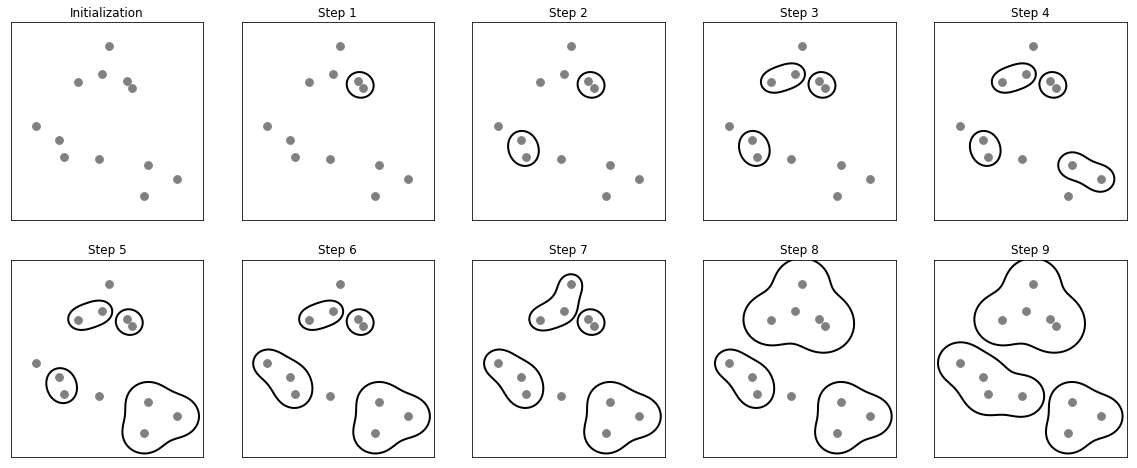

In [126]:
mglearn.plots.plot_agglomerative_algorithm()
# Agglomerative clustering iteratively joins the two closest clusters

Text(0,0.5,'Feature 1')

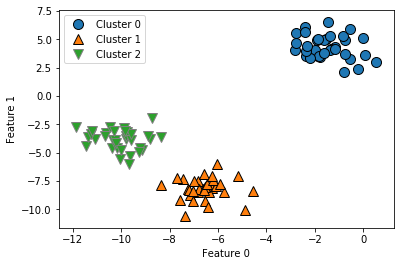

In [127]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)

assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [128]:
assignment

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

### HIERARCHICAL CLUSTERING AND DENDROGRAMS

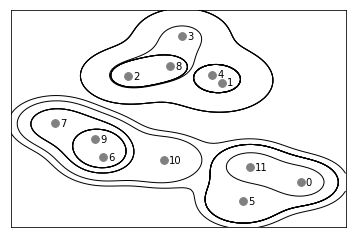

In [129]:
mglearn.plots.plot_agglomerative()

Text(0,0.5,'Cluster distance')

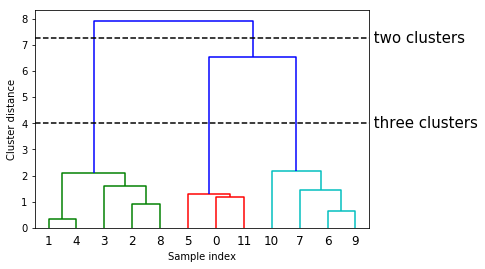

In [130]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [131]:
bounds

(0.0, 120.0)

In [132]:
ax

### DBSCAN (density-based spatial clustering of applications with noise)

In [133]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


As you can see, all data points were assigned the label -1, which stands for noise.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


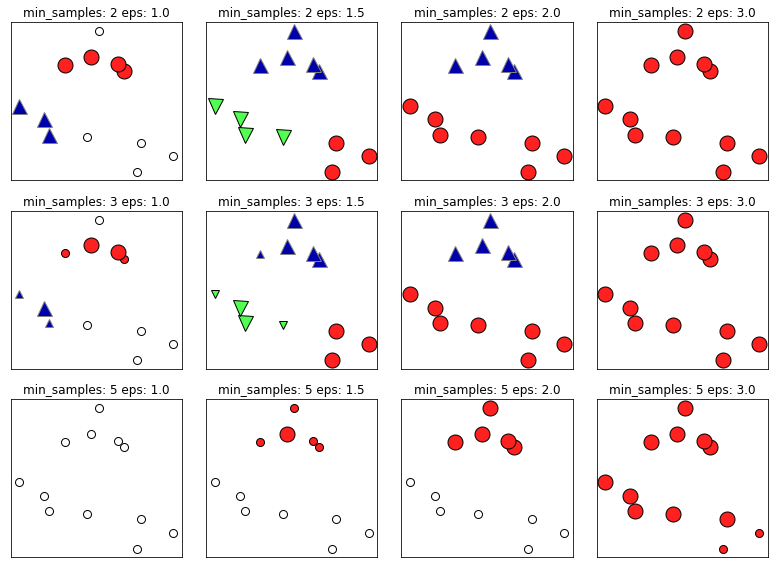

In [134]:
mglearn.plots.plot_dbscan()

The parameter eps is somewhat more important, as it determines what it means for points to be “close.”

While DBSCAN doesn’t require setting the number of clusters explicitly, setting eps implicitly controls how many clusters will be found. Finding a good setting for eps is sometimes easier after scaling the data using StandardScaler or MinMaxScaler, as using these scaling techniques will ensure that all features have similar ranges.

Text(0,0.5,'Feature 1')

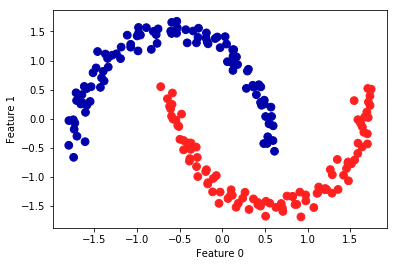

In [135]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [136]:
clusters

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [137]:
X_scaled.shape

(200, 2)

In [139]:
len(clusters)

200

As the algorithm produced the desired number of clusters (two), the parameter settings seem to work well.

When using DBSCAN, you need to be careful about handling the returned cluster assignments. The use of -1 to indicate noise might result in unexpected effects when using the cluster labels to index another array.

Text(0,0.5,'Feature 1')

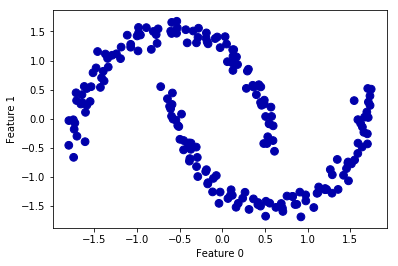

In [140]:
dbscan = DBSCAN(eps=.7)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

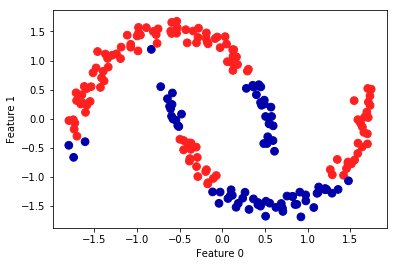

In [141]:
dbscan = DBSCAN(eps=.2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

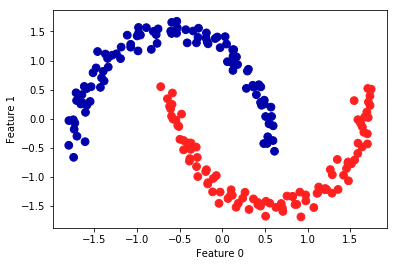

In [142]:
dbscan = DBSCAN(min_samples=6)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

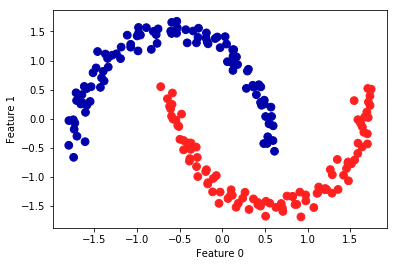

In [143]:
dbscan = DBSCAN(min_samples=7)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

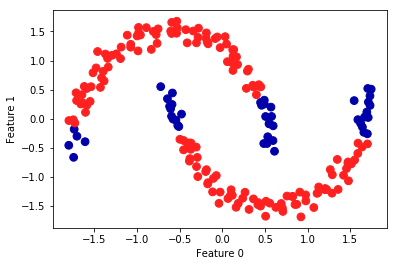

In [147]:
dbscan = DBSCAN(min_samples=19)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Comparing and Evaluating Clustering Algorithms

#### EVALUATING CLUSTERING WITH GROUND TRUTH

the adjusted rand index (ARI) and normalized mutual information (NMI) which both provide a quantitative measure with an optimum of 1 and a value of 0 for unrelated clusterings 

Here, we compare the k-means, agglomerative clustering, and DBSCAN algorithms using ARI. 

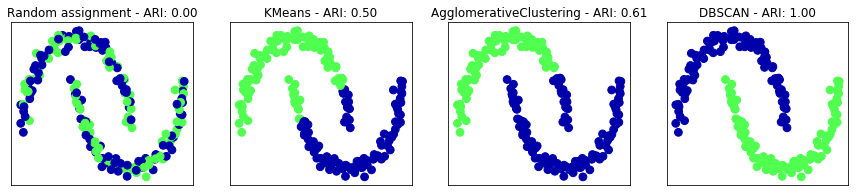

In [148]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [149]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


### EVALUATING CLUSTERING WITHOUT GROUND TRUTH

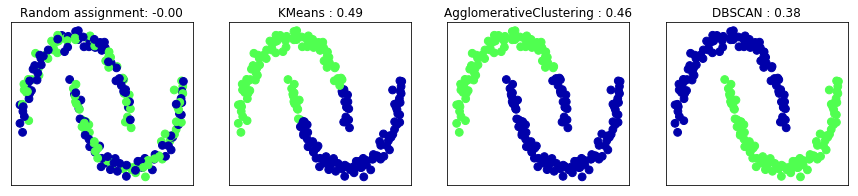

In [150]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

#### COMPARING ALGORITHMS ON THE FACES DATASETm

In [152]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)

pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [154]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_people)

print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [153]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)

print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


the returned labels are –1, so all of the data was labeled as “noise” by DBSCAN. There are two things we can change to help this: we can make eps higher, to expand the neighborhood of each point, and set min_samples lower, to consider smaller groups of points as clusters.

In [155]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [156]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [158]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
# Count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# The first number in the result corresponds to noise points.
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  35 2028]


There are very few noise points—only 27

In [160]:
noise = X_people[labels==-1]
noise.shape

(35, 5655)

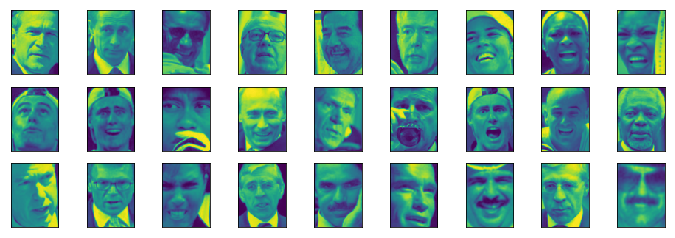

In [161]:
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [164]:
axes.ravel().shape

(27,)

In [166]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [2063]

eps=3
Number of clusters: 1
Cluster sizes: [2063]

eps=5
Number of clusters: 2
Cluster sizes: [2060    3]

eps=7
Number of clusters: 10
Cluster sizes: [2015    3   18    4    3    3    3    4    7    3]

eps=9
Number of clusters: 7
Cluster sizes: [1308  740    3    3    3    3    3]

eps=11
Number of clusters: 2
Cluster sizes: [ 428 1635]

eps=13
Number of clusters: 2
Cluster sizes: [ 128 1935]


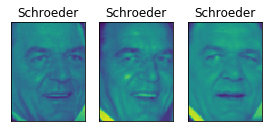

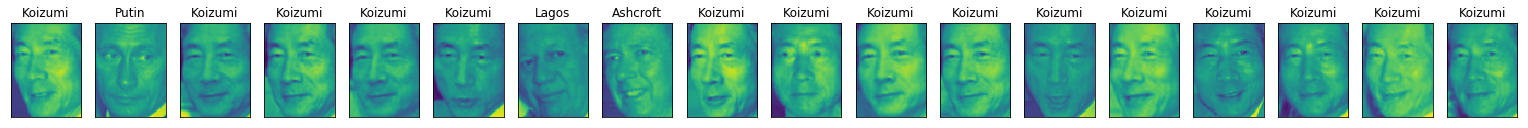

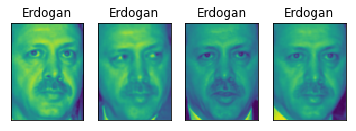

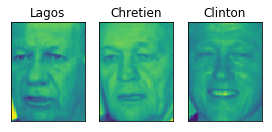

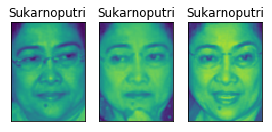

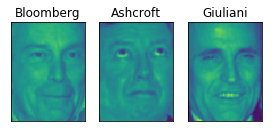

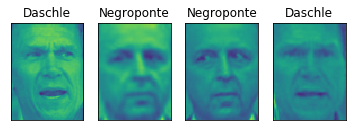

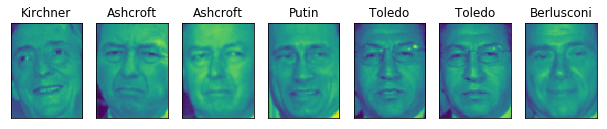

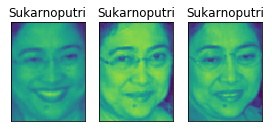

In [167]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

#### Analyzing the faces dataset with k-means

In [168]:
# extract clusters with k-means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)

print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [ 78 179 179 189 235 355 286 252 139 171]


k-means clustering partitioned the data into relatively similarly sized clusters from 78 to 355

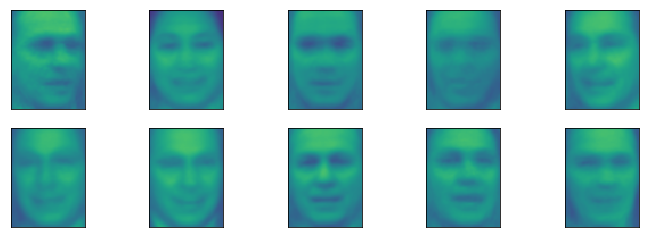

In [169]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

In [171]:
km.cluster_centers_.shape

(10, 100)

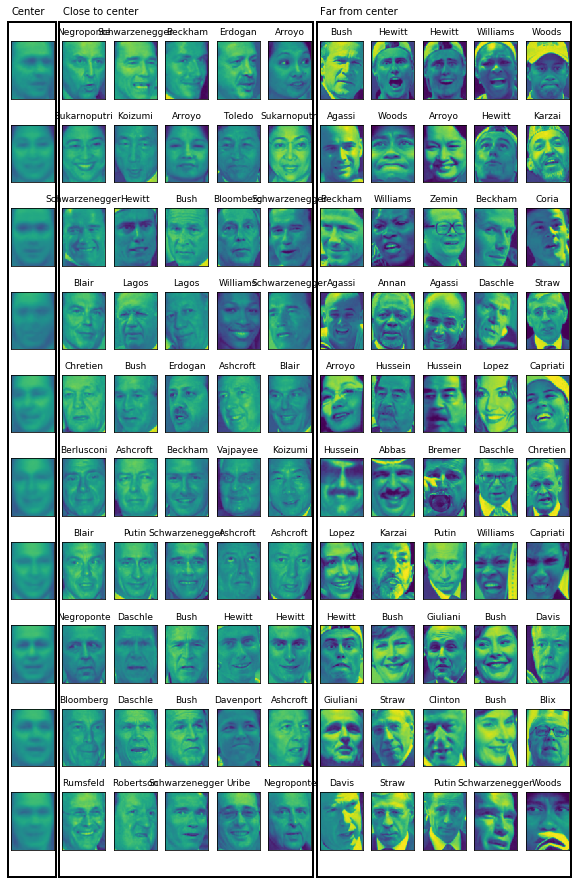

In [172]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

#### Analyzing the faces dataset with agglomerative clustering

In [173]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)

print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [260 560 545  52  38 168  44 236 133  27]


Agglomerative clustering also produces relatively equally sized clusters, with cluster sizes between 27 and 560.

In [174]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


Text(0,0.5,'Cluster distance')

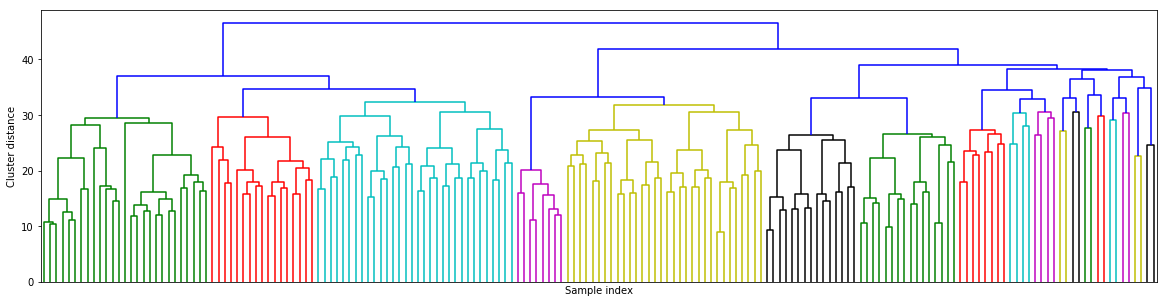

In [175]:
linkage_array = ward(X_pca)

# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))

dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

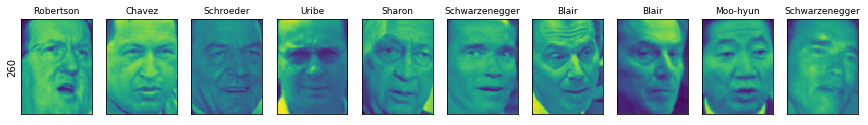

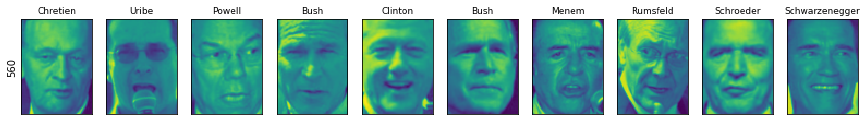

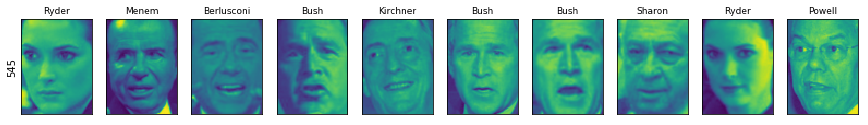

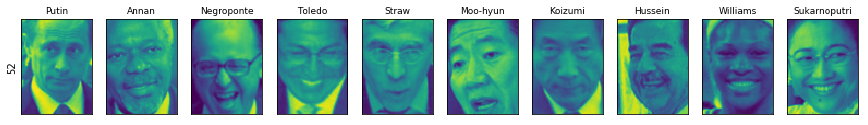

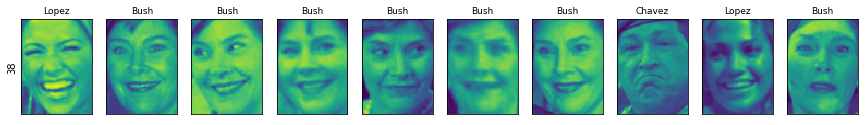

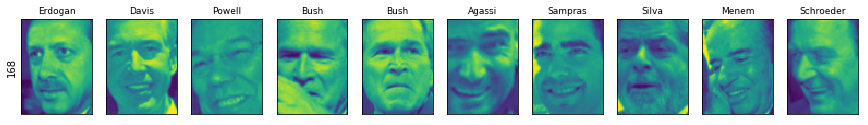

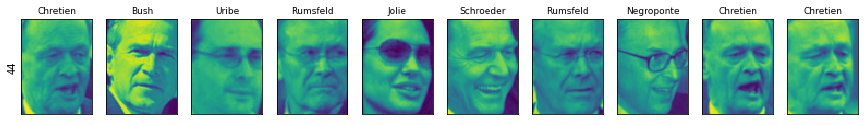

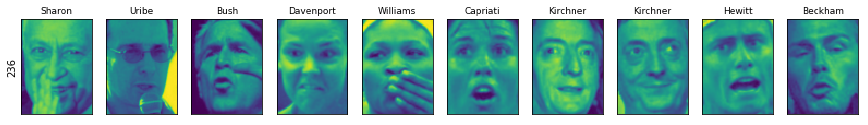

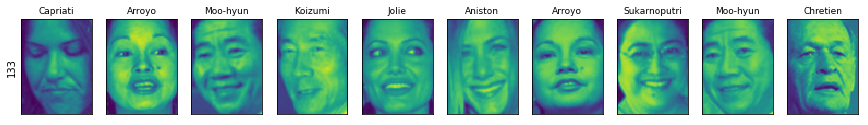

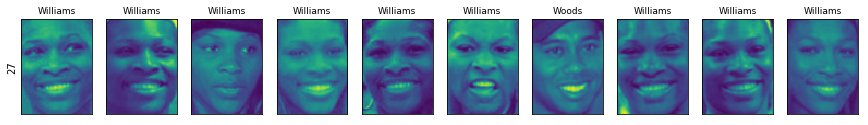

In [176]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
# each row corresponds to one cluster; the number to the left lists the number of images in each cluster